In [2]:
import pandas as pd
import scipy
import statsmodels
import numpy as np
import matplotlib.pyplot as plt
import random as rnd

In [3]:
wine_data = pd.read_csv("data/wine.data")

# 1. Deskriptiv statistik

In [4]:
grape_1_Alcohol = wine_data["Alcohol"].loc[1]
grape_2_Alcohol = wine_data["Alcohol"].loc[2]
grape_3_Alcohol = wine_data["Alcohol"].loc[3]

grape_1_Alc_mean = grape_1_Alcohol.mean()
grape_2_Alc_mean = grape_2_Alcohol.mean()
grape_3_Alc_mean = grape_3_Alcohol.mean()

grape_1_standard_deviation = grape_1_Alcohol.std()
grape_2_standard_deviation = grape_2_Alcohol.std()
grape_3_standard_deviation = grape_3_Alcohol.std()

print(f"Druva 1: medelvärde = {grape_1_Alc_mean} standard avvikelse = {grape_1_standard_deviation}")
print(f"Druva 2: medelvärde = {grape_2_Alc_mean} standard avvikelse = {grape_2_standard_deviation}")
print(f"Druva 3: medelvärde = {grape_3_Alc_mean} standard avvikelse = {grape_3_standard_deviation}")

Druva 1: medelvärde = 13.744745762711865 standard avvikelse = 0.46212535966129437
Druva 2: medelvärde = 12.278732394366195 standard avvikelse = 0.5379642302964676
Druva 3: medelvärde = 13.153750000000002 standard avvikelse = 0.5302413139918747


Summan av alla x där x är en alkohol halt i tabelen för en specific druva delat på antalet x utycket som n
$$ \overline x = \frac {\sum x } n$$
___
Roten ut summan av all x där x är en alkohol halt i tabelen för en specifik druva plus medlevärdet för en druv sort upphöjt med 2, delat på n där n är antalet rader för en specifik druva.
$$ s = \sqrt{\frac{\sum(x + \overline x)^2} n} $$

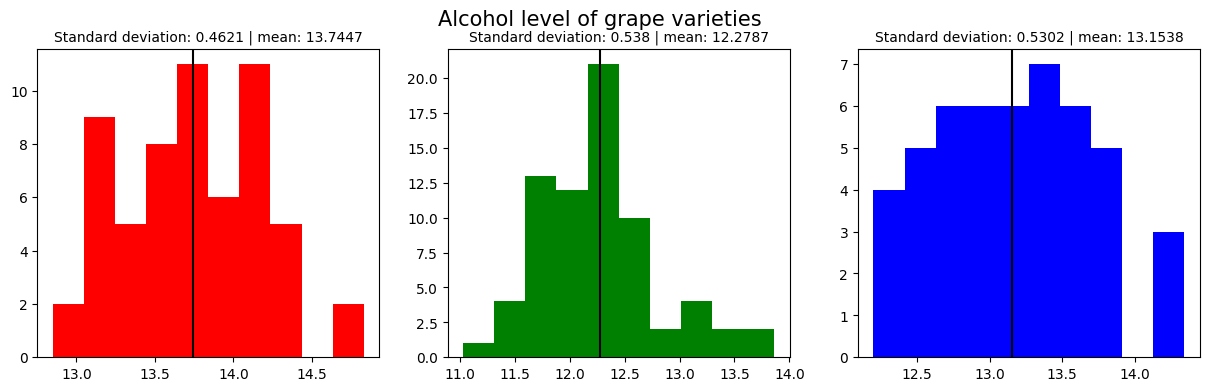

In [5]:
fig, axes = plt.subplots(1,3 , dpi = 100, figsize = (15,4))
axes[0].hist(grape_1_Alcohol, color = "r")
axes[0].axvline(grape_1_Alc_mean, color = "black")
axes[0].set_title(f"Standard deviation: {round(grape_1_standard_deviation, 4)} | mean: {round(grape_1_Alc_mean, 4)}", fontsize = 10)
axes[1].hist(grape_2_Alcohol, color = "g")
axes[1].axvline(grape_2_Alc_mean, color = "black")
axes[1].set_title(f"Standard deviation: {round(grape_2_standard_deviation, 4)} | mean: {round(grape_2_Alc_mean, 4)}", fontsize = 10)
axes[2].hist(grape_3_Alcohol, color = "b")
axes[2].axvline(grape_3_Alc_mean, color = "black")
axes[2].set_title(f"Standard deviation: {round(grape_3_standard_deviation, 4)} | mean: {round(grape_3_Alc_mean, 4)}", fontsize = 10)
plt.suptitle("Alcohol level of grape varieties", fontsize = 15);

Alkohol halten för de olika druvorna verkar ha en underliggande fördelning. Då majoriteten av värden ligger grupperade i mitten med mindre värden som ligger längre ut från mitten.

Druva 1 (Färg: Röd) verkar ha en normalfördelning dock inte en stark då den har toppar ut på svansarna där de är lika med medelvärdet.

Druva 2 (Färg: Gröm) verkar ha en ganska bra normalfördelning då den inte har nårgra toppar som matchar till medelvärdet.

Druva 3 (Färg: Blå) verkar inte ha en bra normal fördelnign då den är väldigt jämnlängs hela.

# Hypotestest och konfidensintervall

## 2

In [6]:
rnd.seed(2023)

winedata_grape2 = wine_data.loc[2].reset_index().rename({"index": "Grape Variant"}, axis = 1)

index_smaple = []

while True:
    rand_value = rnd.randint(winedata_grape2.index.min(), winedata_grape2.index.max())
    if rand_value not in index_smaple:
        index_smaple.append(rand_value)

    if len(index_smaple) == 15:
        break

wine_data_grape_2_samples = winedata_grape2.loc[index_smaple].reset_index(drop = True)

H0 = 1.75 kommer att ligga inom konfidensintervallet  |  H0 <= 1.74

H1 = 1.75 kommer att ligga utan för konfidensintervallet | H0 > 1.74

$$ \overline x \underline + z_ {\frac {a} 2} {\sigma} / {\sqrt {n}} $$

In [7]:
sample_data = wine_data_grape_2_samples["Proanthocyanins"]
sample_mean = sample_data.mean()
sample_stan_dev = sample_data.std()
scipy.stats.norm.interval(0.95, loc = sample_mean, scale = sample_stan_dev)

(0.6542807214401104, 2.57371927855989)

Efter som att 1.74 ligger inom konfidensintervallet kommer H0 ej att förkastas.

Vi skapar ett konfidensintervall som kommer att ligga mellan två värden. Sedan kollar vi om nollhypotesen ligger inom det skapade konfidensintevallet om den ligger inom intervallet kommer H0 ej att förkastas. Med tanke på att vårat H0 ligger inom intervallet kommer den ej att förkastas.

## 3

In [8]:
rnd.seed(2023)

ex3_winedata_grape2 = wine_data.loc[2].reset_index().rename({"index": "Grape Variant"}, axis = 1)
ex3_winedata_grape3 = wine_data.loc[3].reset_index().rename({"index": "Grape Variant"}, axis = 1)

index_sample_grape2 = []
index_sample_grape3 = []

while True:
    rand_value = rnd.randint(ex3_winedata_grape2.index.min(), ex3_winedata_grape2.index.max())
    if rand_value not in index_smaple:
        index_sample_grape2.append(rand_value)

    if len(index_sample_grape2) == 20:
        break

while True:
    rand_value = rnd.randint(ex3_winedata_grape3.index.min(), ex3_winedata_grape3.index.max())
    if rand_value not in index_smaple:
        index_sample_grape3.append(rand_value)

    if len(index_sample_grape3) == 20:
        break

ex2_wine_data_grape2_sample = ex3_winedata_grape2.loc[index_sample_grape2].reset_index(drop = True)
ex3_wine_data_grape3_sample = ex3_winedata_grape3.loc[index_sample_grape3].reset_index(drop = True)

Konfidensintervall när standard avvikelsen är okänd:
$$ (\overline x_ 1 - \overline x_ 2) \underline + t_ {a/2, df} \sqrt {\frac {S_1 ^2} n_1 + \frac {S_2 ^2} n_2} $$

Formeln för att få fram t värdet:
$$ t = \frac {(\overline X - \mu)} {(s / {\sqrt n})} $$ 

Formeln för att få fram stickprovsstandardavvikelsen görs för båda stickproven:
$$ s = \sqrt {\frac {\sum (x - \overline x) ^2} {n - 1}} $$

Formeln för att få fram frihetsgraderna som används i formeln för konfidensintervallet:
$$ df = \frac {(\frac{(s_1 ^2)} n_1 \hspace{1mm} + \hspace{1mm} \frac{(s_2 ^2)}n_2) ^2} {\frac{(s_1^2) ^2} {(n_1-1)} \hspace{1mm} + \hspace{1mm} \frac{(s_2^2/n_2)^2} {(n_2 -1)}} $$

In [9]:
sample_data_grape2 = ex2_wine_data_grape2_sample["Total phenols"]
grape2_sample_mean = sample_data_grape2.mean()
grape2_sample_stan_dev = scipy.stats.tstd(sample_data)

sample_data_grape3 = ex3_wine_data_grape3_sample["Total phenols"]
grape3_sample_mean = sample_data_grape3.mean()
grape3_sample_stan_dev = scipy.stats.tstd(sample_data)

print(scipy.stats.ttest_rel(sample_data_grape2, sample_data_grape3))
print(scipy.stats.ttest_rel(sample_data_grape2, sample_data_grape3).confidence_interval(confidence_level=0.95))

TtestResult(statistic=3.2197881875498466, pvalue=0.004509535244576026, df=19)
ConfidenceInterval(low=0.17007558783657784, high=0.8019244121634223)


För att det p värdet som räknades ut från vårat stickprov hamnar utanför det konfidence intevallet vi satte upp kommer vi att förkastas nollhypotesen.

Om man ökar stickprovsstorleken kommer konfidence intervallet att bli smallare.

Om man misnkar konfidence graden kommer konfidence intevallet man sätter upp var smalare och om man ökar konfidence graden kommer konfidence intevallet att bli breddare.

## 4

In [10]:
rnd.seed(2023)

ex4_winedata_grape2 = wine_data.loc[2].reset_index().rename({"index": "Grape Variant"}, axis = 1)
ex4_winedata_grape3 = wine_data.loc[3].reset_index().rename({"index": "Grape Variant"}, axis = 1)

index_sample_grape2 = []
index_sample_grape3 = []

while True:
    rand_value = rnd.randint(ex4_winedata_grape2.index.min(), ex4_winedata_grape2.index.max())
    if rand_value not in index_smaple:
        index_sample_grape2.append(rand_value)

    if len(index_sample_grape2) == 25:
        break

while True:
    rand_value = rnd.randint(ex4_winedata_grape3.index.min(), ex4_winedata_grape3.index.max())
    if rand_value not in index_smaple:
        index_sample_grape3.append(rand_value)

    if len(index_sample_grape3) == 25:
        break

ex4_wine_data_grape2_sample = ex4_winedata_grape2.loc[index_sample_grape2].reset_index(drop = True)
ex4_wine_data_grape3_sample = ex4_winedata_grape3.loc[index_sample_grape3].reset_index(drop = True)

ex4_wine_data_grape2_above_20 = ex4_wine_data_grape2_sample[ex4_wine_data_grape2_sample["Alcalinity of ash"] > 20].reset_index(drop = True)
ex4_wine_data_grape3_above_20 = ex4_wine_data_grape3_sample[ex4_wine_data_grape3_sample["Alcalinity of ash"] > 20].reset_index(drop = True)

Nollhypotesen blir för denna uppgift att andelen druvor med alkaliniteten över 20 för druva 2 inte kommer att vara lika med andelen druvor med Alkaliniteten över 20 för druva 3.
$$ H0 = Alcalinty_1 \neq Alcalinity_2 $$
Alternativhypotesen blir för denna uppgiften att andelen druvor med alkaliniteten över 20 för druva 2 kommer att vara like med andelen druvor med alkaliniteten över 20 för druva 3
$$ HA = Alcalinty_1 = Alcalinity_2 $$

In [11]:
from statsmodels.stats.api import proportions_ztest

grape2_above_20_count = len(ex4_wine_data_grape2_above_20)
grape3_above_20_count = len(ex4_wine_data_grape3_above_20)
grape2_sample_len = len(ex4_wine_data_grape2_sample)
grape3_sample_len = len(ex4_wine_data_grape3_sample)

z_value, p_value = proportions_ztest([grape2_above_20_count, grape3_above_20_count], [grape2_sample_len, grape3_sample_len])
print(round(z_value, 2), round(p_value, 5))

-2.85 0.00439


$$ P(z\underline < -2.85) = 0.0022$$
Detta kommer att bli våran signifikans nivå för denna ut räkningen. Med tanke på att vårat p värde ligger över signifikans nivån kommer vi ej att förkasta H0. 

# Korrelation och Regression

In [20]:
df_wine = wine_data.reset_index().rename({"index": "Grape Variant"}, axis = 1)
corr_plot = df_wine.corr()
corr_plot.style.background_gradient(cmap="PuRd")

AttributeError: 'DataFrame' object has no attribute 'styler'